In [1]:
# read nc output from WAOM 10km run

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as ma
import cartopy.crs as ccrs
import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

#import iris
#import iris.iterate
#import iris.coords
#import iris.plot as iplt
import gsw


In [28]:
ds = xr.open_dataset('/scratch/project_2000789/boeiradi/waom4extend_shflim_S_0.25Q/output_01-20yr/ocean_avg_0014.nc')
salt_yr14 = np.nanmean(ds.variables["salt"], axis=0)
ds.close()

ds = xr.open_dataset('/scratch/project_2000789/boeiradi/waom4extend_shflim_S_0.25Q/output_01-20yr/ocean_avg_0015.nc')
salt_yr15 = np.nanmean(ds.variables["salt"], axis=0)
ds.close()



/run/nvme/job_13662812/tmp/ipykernel_53245/809202461.py:2: RuntimeWarning: Mean of empty slice
  salt_yr14 = np.nanmean(ds.variables["salt"], axis=0)
/run/nvme/job_13662812/tmp/ipykernel_53245/809202461.py:6: RuntimeWarning: Mean of empty slice
  salt_yr15 = np.nanmean(ds.variables["salt"], axis=0)


In [30]:
# remove salinity values higher than 35
salt_yr14 = np.where(salt_yr14<35,salt_yr14,35)
salt_yr14 = np.where(ds.mask_rho==0, np.nan, salt_yr14)
np.nanmax(salt_yr14)
          

35.0

In [31]:
print(salt_yr14.shape)

(31, 1400, 1575)


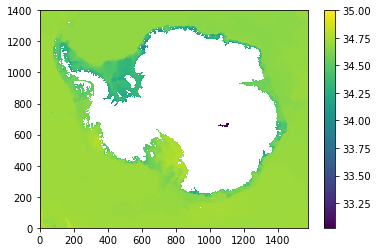

In [33]:
plt.pcolormesh(salt_yr14[0,:,:])
plt.colorbar()
plt.show()